In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
import seaborn as sns
import optuna
import warnings
import re
from scipy.stats import gamma
from sklearn.compose import TransformedTargetRegressor
from sklearn import set_config
from colorama import Style, Fore
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_predict
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import Ridge
from category_encoders import TargetEncoder, OneHotEncoder, MEstimateEncoder, OrdinalEncoder, CatBoostEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer,mean_squared_error
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor, HistGradientBoostingClassifier
from tensorflow import feature_column
import math

In [246]:
train = pd.read_csv(r'/Users/Henry/Downloads/widsdatathon2024-challenge2/train.csv', index_col='patient_id')
test = pd.read_csv(r'/Users/Henry/Downloads/widsdatathon2024-challenge2/test.csv', index_col='patient_id')
print(train.shape)

(13173, 151)


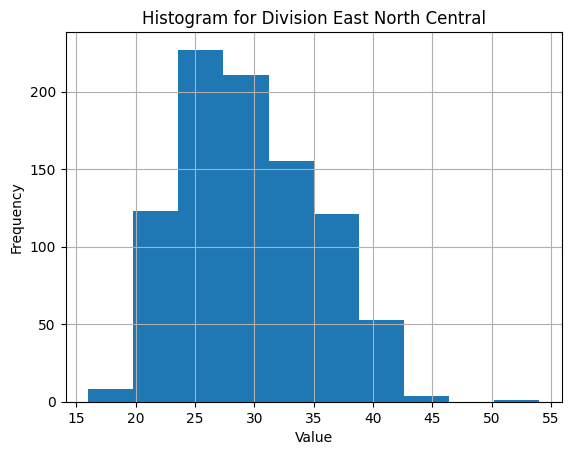

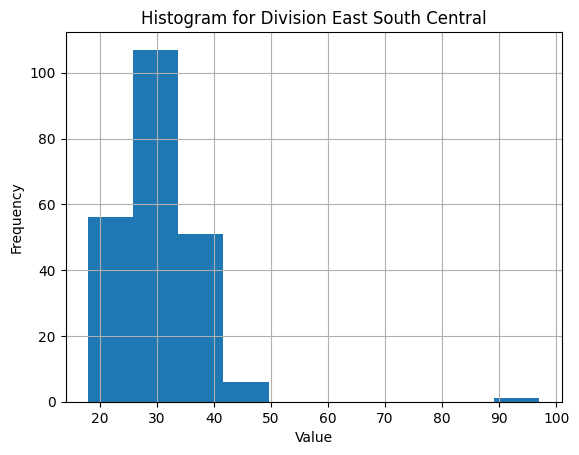

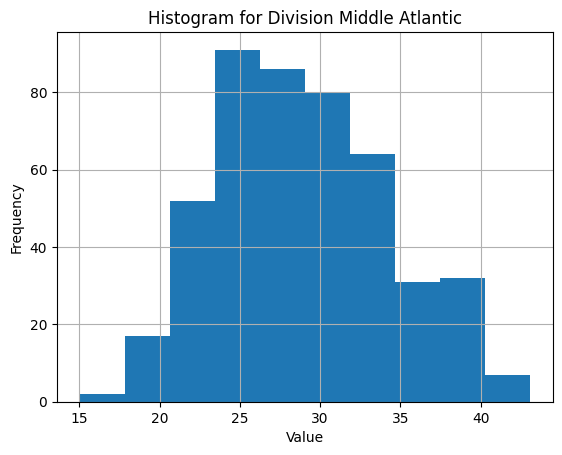

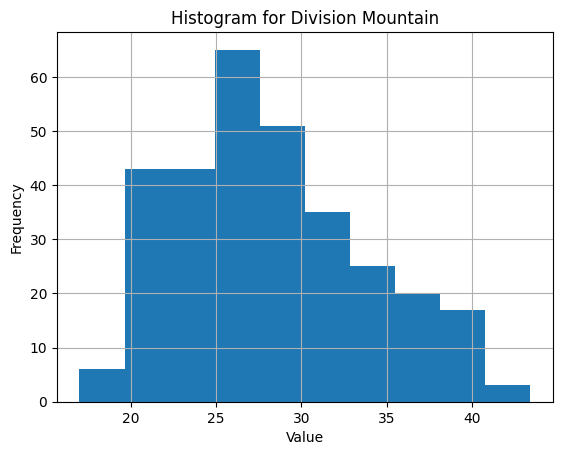

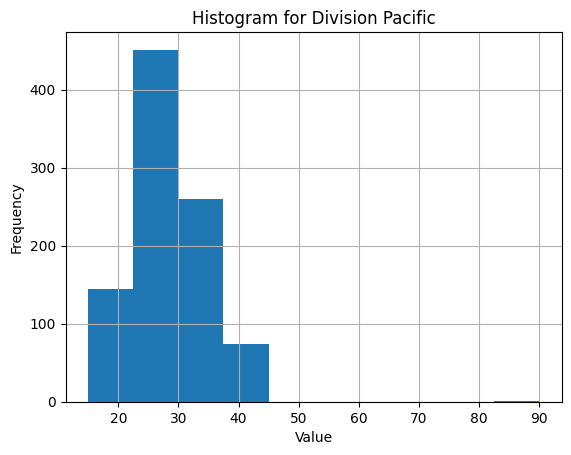

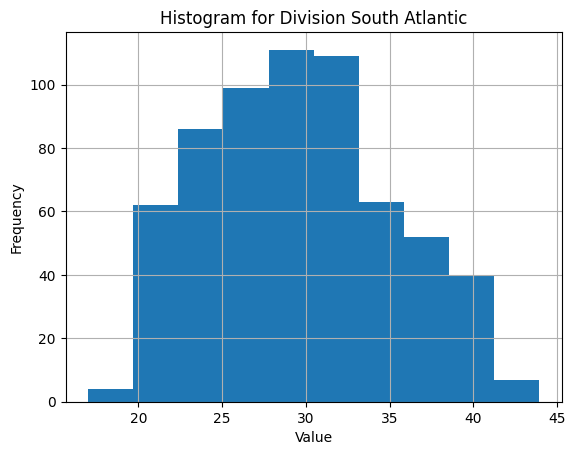

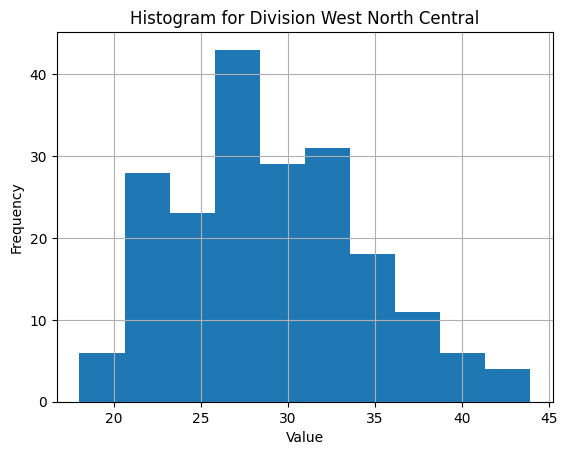

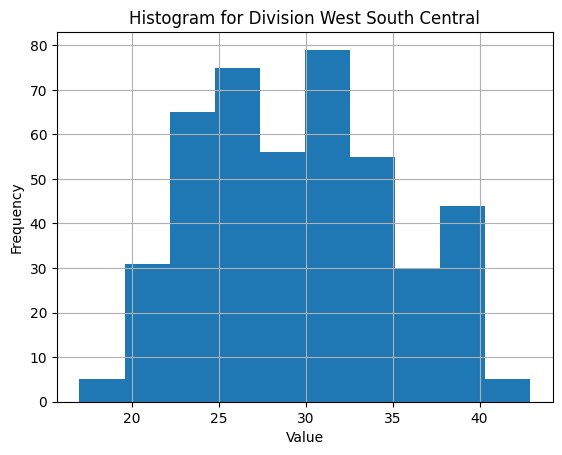

In [247]:
train_nonullbmi = train.copy()
train_nonullbmi.dropna(subset=['bmi'], inplace=True)
grouped_data = train_nonullbmi.groupby('Division')

# Iterate over each group (unique zipcode) and plot a histogram
for division, group in grouped_data:
    plt.figure()  # Create a new figure for each histogram
    group['bmi'].hist()
    plt.title(f'Histogram for Division {division}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

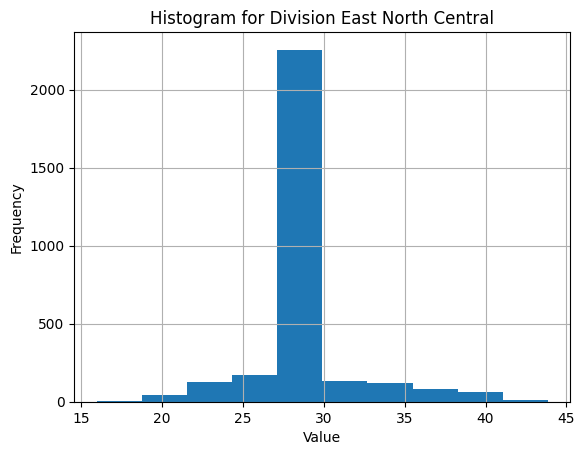

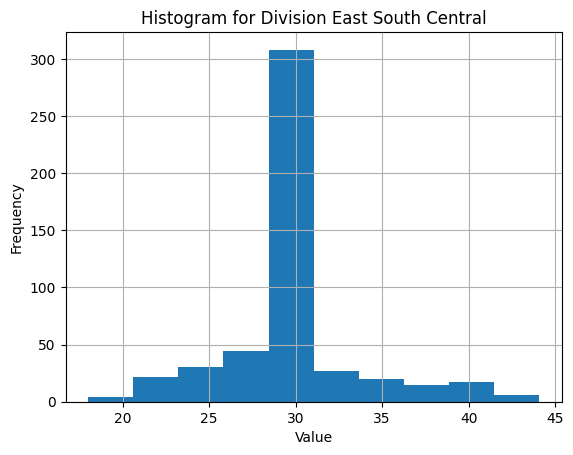

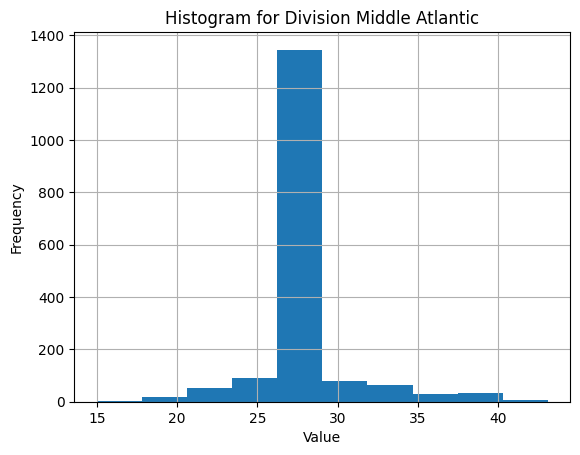

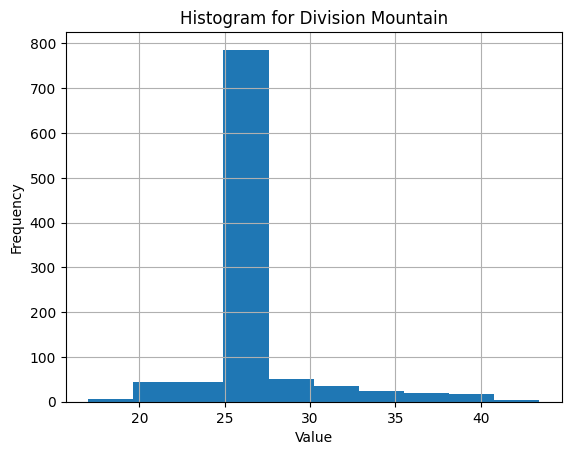

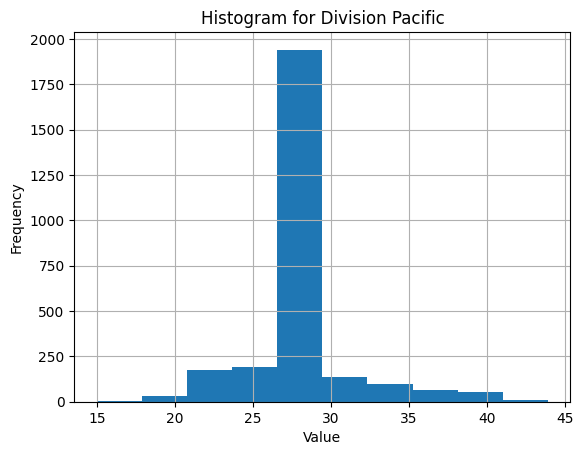

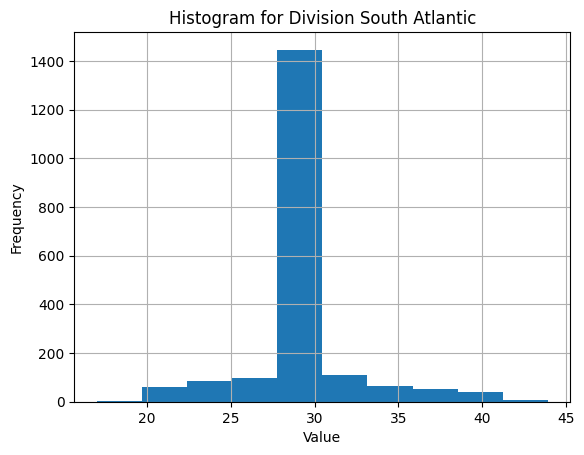

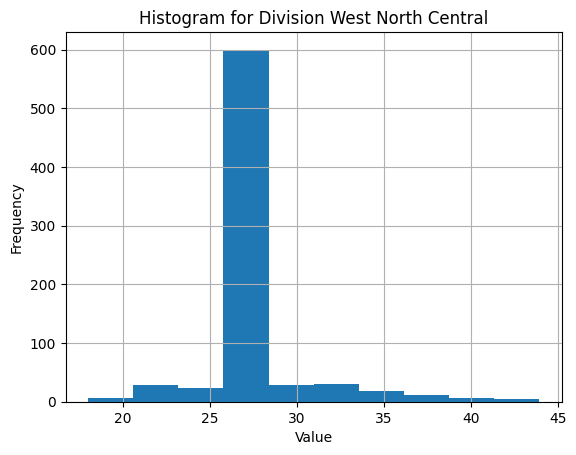

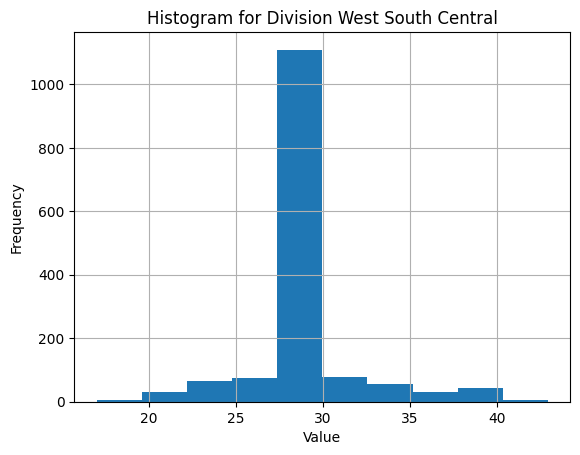

In [222]:

train_eastnorthcentral = train_nonullbmi[train_nonullbmi["Division"]=="East North Central"]
train_eastsouthcentral = train_nonullbmi[train_nonullbmi["Division"]=="East South Central"]
train_middleatlantic = train_nonullbmi[train_nonullbmi["Division"]=="Middle Atlantic"]
train_mountain = train_nonullbmi[train_nonullbmi["Division"]=="Mountain"]
train_pacific = train_nonullbmi[train_nonullbmi["Division"]=="Pacific"]
train_southatlantic = train_nonullbmi[train_nonullbmi["Division"]=="South Atlantic"]
train_westnorthcentral = train_nonullbmi[train_nonullbmi["Division"]=="West North Central"]
train_westsouthcentral = train_nonullbmi[train_nonullbmi["Division"]=="West South Central"]
train_bmimask = train["bmi"].isnull()

training = train.loc[train_bmimask]


training.loc[train["Division"] == "East North Central", "bmi"] = np.median(train_eastnorthcentral["bmi"])
training.loc[train["Division"] == "East South Central", "bmi"] = np.median(train_eastsouthcentral["bmi"])
training.loc[train["Division"] == "Middle Atlantic", "bmi"] = np.median(train_middleatlantic["bmi"])
training.loc[train["Division"] == "Mountain", "bmi"] = np.median(train_mountain["bmi"])
training.loc[train["Division"] == "Pacific", "bmi"] = np.median(train_pacific["bmi"])
training.loc[train["Division"] == "South Atlantic", "bmi"] = np.median(train_southatlantic["bmi"])
training.loc[train["Division"] == "West North Central", "bmi"] = np.median(train_westnorthcentral["bmi"])
training.loc[train["Division"] == "West South Central", "bmi"] = np.mean(train_westsouthcentral["bmi"])

train = pd.concat([training, train_nonullbmi])
train = train[train['bmi']<50]
grouped_data_train = train.groupby('Division')          
for division, traingroup in grouped_data_train:
    plt.figure()  # Create a new figure for each histogram
    traingroup['bmi'].hist()
    plt.title(f'Histogram for Division {division}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


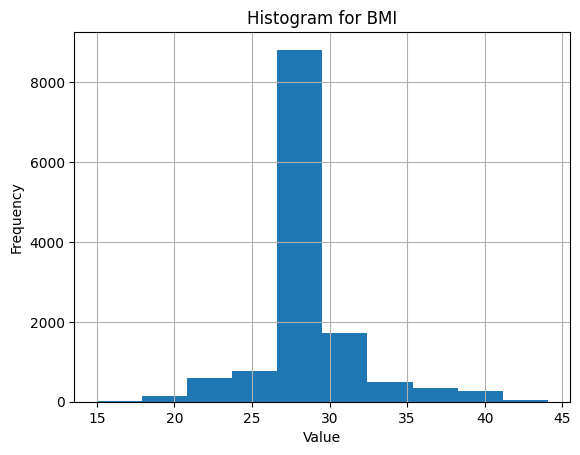

In [223]:
plt.figure()  # Create a new figure for each histogram
train['bmi'].hist()
plt.title('Histogram for BMI')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

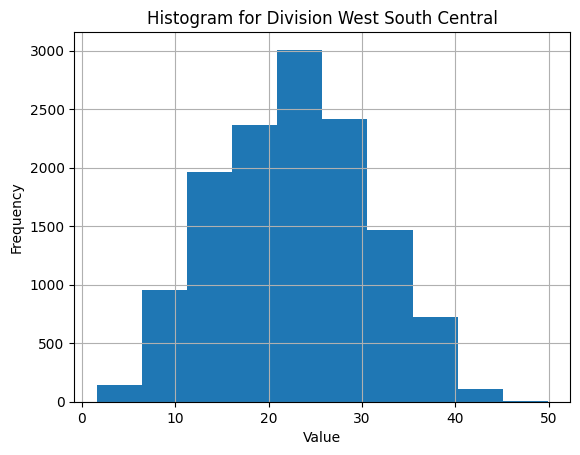

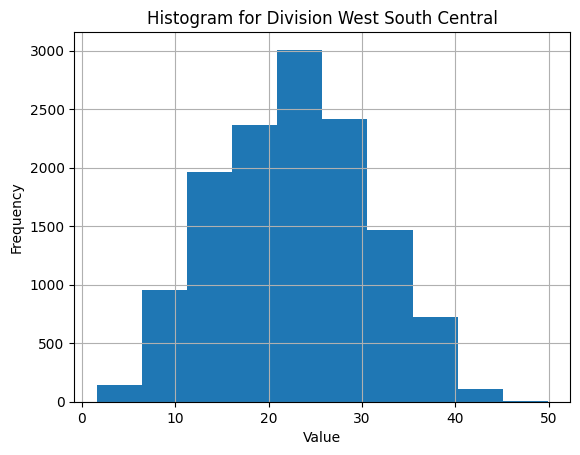

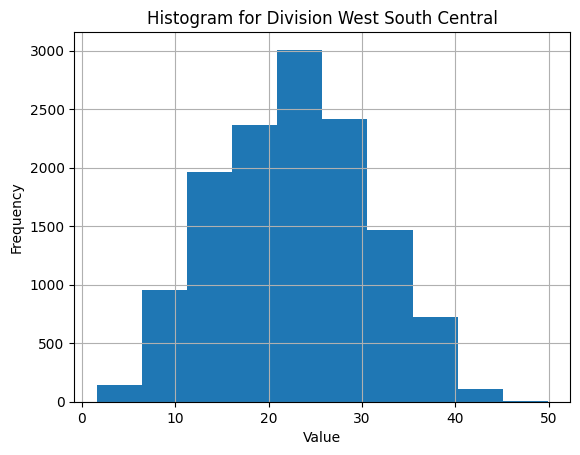

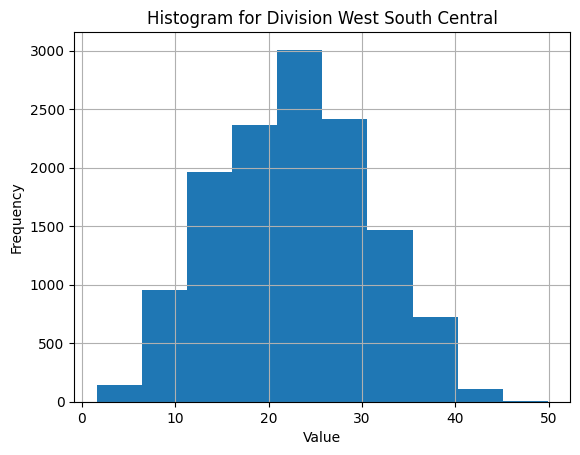

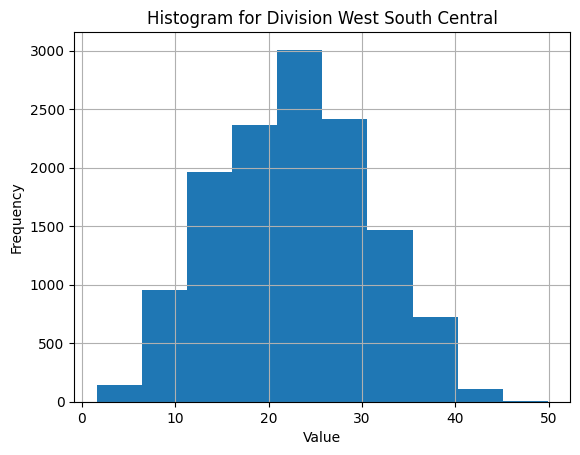

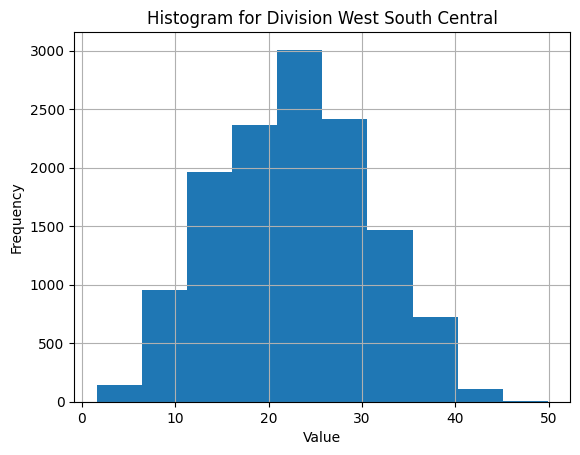

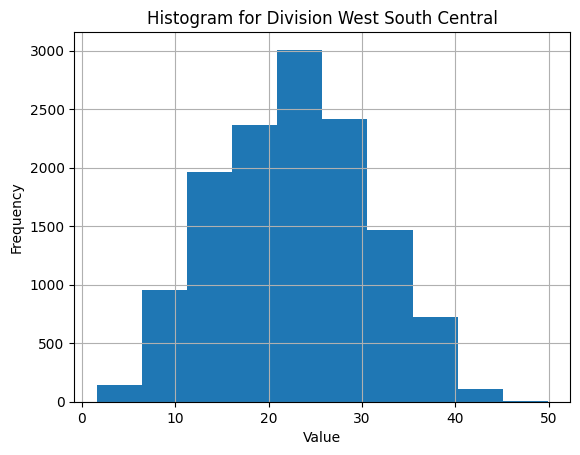

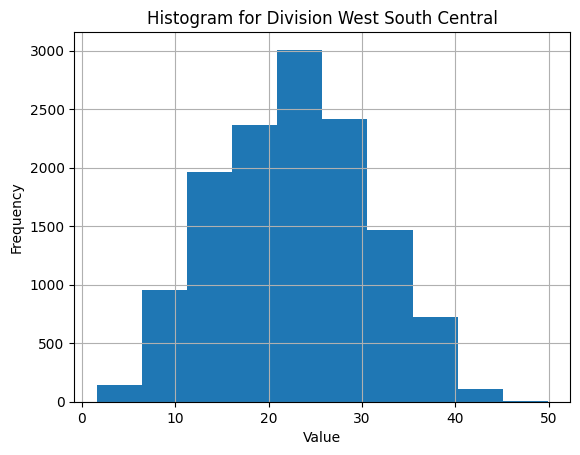

In [248]:
train_eastnorthcentral = train_nonullbmi[train_nonullbmi["Division"]=="East North Central"]
train_eastsouthcentral = train_nonullbmi[train_nonullbmi["Division"]=="East South Central"]
train_middleatlantic = train_nonullbmi[train_nonullbmi["Division"]=="Middle Atlantic"]
train_mountain = train_nonullbmi[train_nonullbmi["Division"]=="Mountain"]
train_pacific = train_nonullbmi[train_nonullbmi["Division"]=="Pacific"]
train_southatlantic = train_nonullbmi[train_nonullbmi["Division"]=="South Atlantic"]
train_westnorthcentral = train_nonullbmi[train_nonullbmi["Division"]=="West North Central"]
train_westsouthcentral = train_nonullbmi[train_nonullbmi["Division"]=="West South Central"]



shape, loc, scale = gamma.fit(train_eastnorthcentral['bmi'])
training = train.loc[train_bmimask]
training.loc[train["Division"] == "East North Central", "bmi"] = np.random.gamma(shape=shape, scale=scale, size=2107)

modeled = pd.DataFrame()

grouped_data_train = train.groupby('Division')          
for division, trainingroup in grouped_data_train:
    division_word = division
    division = division.replace(" ", "")
    division = division.lower()
    variable = f'train_{division}'
    shape, loc, scale = gamma.fit(locals()[variable]['bmi'])
    training = train.loc[train_bmimask]
    training.loc[train["Division"] == f"{division_word}", "bmi"] = np.random.gamma(shape=shape, scale=scale, size=len(training.loc[train["Division"] == f"{division_word}", "bmi"]))
    modeled = pd.concat([training, modeled])

train = pd.concat([modeled, train_nonullbmi])
train = train[train['bmi']<50]
grouped_data_train = train.groupby('Division')          
for division, trainingroup in grouped_data_train:    
    plt.figure()  # Create a new figure for each histogram
    train['bmi'].hist()
    plt.title(f'Histogram for Division {division_word}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

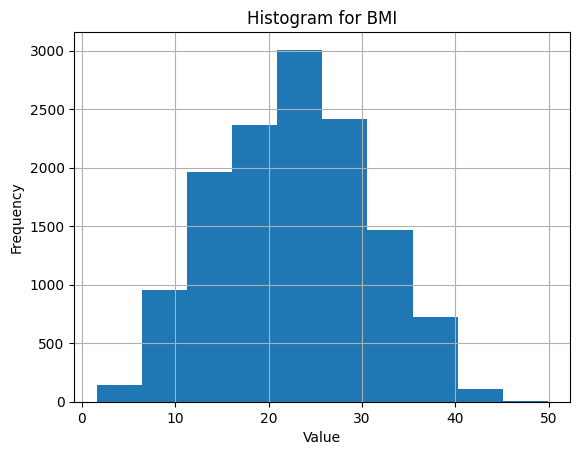

In [249]:
plt.figure()  # Create a new figure for each histogram
train['bmi'].hist()
plt.title(f'Histogram for BMI')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()